# Requried Libraries

In [19]:
# These lines import the necessary libraries and modules for 
# data manipulation (pandas), numerical computations (numpy), plotting (matplotlib.pyplot), a
# nd file and directory operations (glob and os).

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


### Testing For Stationarity
# This line imports the adfuller function from the statsmodels.tsa.stattools module. 
# The adfuller function is used for performing the Augmented Dickey-Fuller test, 
# which is a statistical test for checking the stationarity of a time series. 
from statsmodels.tsa.stattools import adfuller


# Create subplots with one trace per page using go object of plotly.graph_objs module 
#This line imports the go module from the plotly.graph_objs library. 
#The go module provides objects and functions for creating interactive plots and visualization
import plotly.graph_objs as go

# Import TimeSeries class from darts library
# This line imports the TimeSeries class from the darts library.
# The darts library is a time series forecasting and modeling library in Pytho
from darts import TimeSeries

# These lines import the warnings module and set a filter to ignore warning messages.
# This is done to suppress any non-critical warning messages that may arise during the execution of the code
import warnings
warnings.filterwarnings("ignore")

# Helping Visualization functions

In [20]:
def plot(df,x_feature_name,y_feature_name,title):
    """
    This function takes two dataframes as input and plots the number of calls per day and per week.

    Args:
    daily_df (pandas.DataFrame): A dataframe containing daily call data.
    weekly_df (pandas.DataFrame): A dataframe containing weekly call data.

    Returns:
    None
    """

    # Create a subplot with two rows and one column
    # fig = make_subplots(rows=2, cols=1)
    fig = go.Figure()
    # Add a trace for daily calls
    fig.add_trace(
        go.Scatter(
            x=df[x_feature_name],
            y=df[y_feature_name],
            name=y_feature_name,
            mode='lines+markers'
        ))

 

    # Update xaxis properties
    fig.update_xaxes(title_text='Date')

    # Update yaxis properties
    fig.update_yaxes(title_text=y_feature_name)

    # Update title and height
    fig.update_layout(
        title=f'{title}',
        height=500,
        width=1200
    )

    # Show the plot
    fig.show()

    # Write the plot to an HTML file
    # fig.write_html(f'Visualization/btc.html')


def train_test_predicted_plot(df_train,
                              df_test,
                              x_feature ,
                              y_feature,
                              predicted, 
                              model_name):
    """
    Plots the training data, actual values, and forecasted values using Plotly.

    Args:
        train (pd.Series): The training data.
        test (pd.Series): The actual values.
        predicted (pd.Series): The forecasted values.
        model_name (str): The name of the forecasting model.

    Returns:
        None
    """
  

   
    # Create a subplot with two rows and one column
    fig = go.Figure()

    fig.add_trace(
    go.Scatter(
        x=df_train[x_feature],
        y=df_train[y_feature],
        name='Training Data',
        mode='lines+markers'
    ))

    # Add a trace for actual values
    fig.add_trace(
        go.Scatter(
            x=df_test[x_feature],
            y=df_test[y_feature],
            name='Actual Values',
            mode='lines+markers'
        )
    )

    # Add a trace for forecasted values
    fig.add_trace(
        go.Scatter(
            x=predicted[x_feature],
            y=predicted[y_feature],
            name=f'{model_name}',
            mode='lines+markers'
        )
    )

    # Update xaxis properties
    fig.update_xaxes(title_text='Time')

    # Update yaxis properties
    fig.update_yaxes(title_text=y_feature)

    # Update title and height
    fig.update_layout(
        title=f'Forecasting using {model_name}',
        height=500,
        width=1500
    )

    # Save the plot as an HTML file
    fig.show()
    # fig.write_html(f'Visualization/forecasting_using_{model_name}'+'.html')
    # fig.write_imag

# Data Analysis

In [21]:
df = pd.read_csv('Datasets/dataset.csv')
df['date'] = pd.to_datetime(df['date'])

display(df)

,date,sleep_hours
0,2015-02-19,6.400000
1,2015-02-20,7.583333
2,2015-02-21,6.350000
3,2015-02-22,6.500000
4,2015-02-23,8.916667
...,...,...
2349,2021-12-25,7.933333
2350,2021-12-26,3.850000
2351,2021-12-29,6.175000
2352,2021-12-30,5.158333


In [22]:
# This line prints the shape of the DataFrame df using the shape attribute. 
# The shape attribute returns a tuple representing the dimensions of the DataFrame, 
# with the number of rows and columns
print('Shape of the Data ',df.shape)
print('\n')
# These lines print the statistics report of the training data stored in the DataFrame df. 
# The describe() function calculates various summary statistics of the numerical columns in the DataFrame,
# such as count, mean, standard deviation, minimum value, and quartiles. The comment is incomplete
print('Statistics Report of Data')
print(df.describe())



Shape of the Data  (2354, 2)


Statistics Report of Data
       sleep_hours
count  2354.000000
mean      7.356560
std       2.213308
min       1.266667
25%       6.235417
50%       6.816667
75%       7.483333
max      17.433333


# Missing Data/Days

In [23]:
# This line converts the 'date' column in the DataFrame df to datetime 
# format using the pd.to_datetime() function. 
# This is done to ensure that the 'date' column is recognized 
# and processed as dates for further analysis
df['date'] = pd.to_datetime(df['date'])

# This line creates a new pandas DatetimeIndex object called complete_dates using the pd.date_range() function.
# It generates a range of dates starting from the minimum date in the 'date' column of the DataFrame
# df to the maximum date, with a frequency of one day (freq='D'). 
# This will be used to create a complete sequence of dates
complete_dates = pd.date_range(start=df['date'].min() ,end=df['date'].max(),freq='D' )
# This line creates a new DataFrame called completed_dates_df with a single column named 'date' using the pd.DataFrame() function.
completed_dates_df = pd.DataFrame({'date':complete_dates})

# This line merges the completed_dates_df DataFrame with the original DataFrame df based on the 'date' column.
# It performs a left join (how='left'), which means that all the dates from completed_dates_df are included,
# and the corresponding data from df is merged where available.
merged_df = pd.merge(completed_dates_df,df,on='date',how='left')

# This line creates a new DataFrame called missing_days by filtering the merged_df_train DataFrame. 
# It selects only the rows where the 'sleep_hours' column has missing values (NaN)
missing_days = merged_df[merged_df['sleep_hours'].isnull()]

print('Missing Values in days:\n',missing_days.shape[0])

print('Missing Day or Index')
display(missing_days)

Missing Values in days:
 154
Missing Day or Index


,date,sleep_hours
14,2015-03-05,NaN
15,2015-03-06,NaN
16,2015-03-07,NaN
18,2015-03-09,NaN
22,2015-03-13,NaN
...,...,...
2390,2021-09-05,NaN
2399,2021-09-14,NaN
2469,2021-11-23,NaN
2503,2021-12-27,NaN


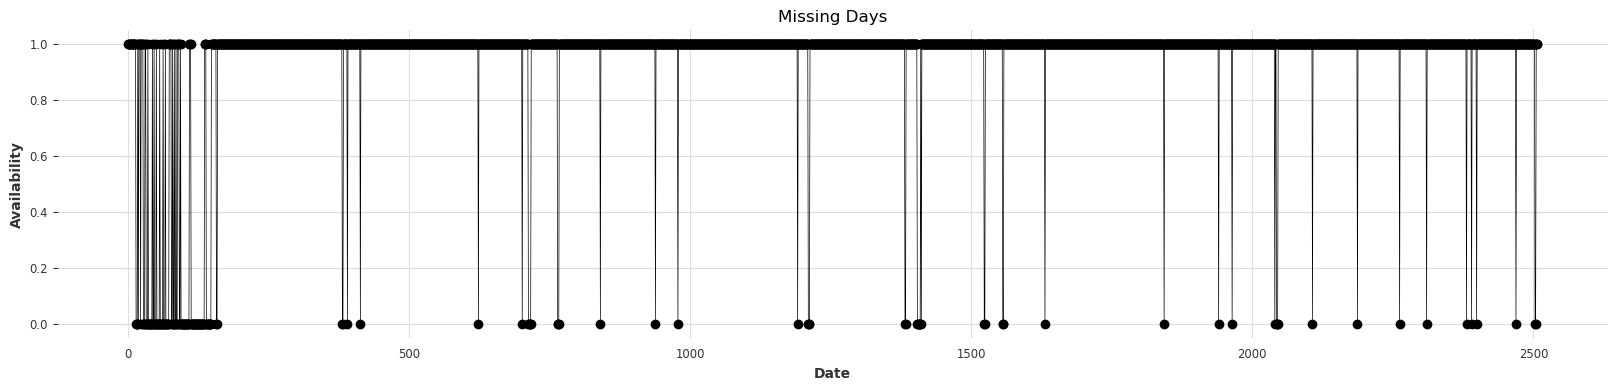

In [24]:

# Visualize the missing days
# This line creates a new figure for the plot with a specified size of 20 units in width and 4 units in height
plt.figure(figsize=(20, 4))
# This line plots the data on the created figure. It uses the plot() function from matplotlib.pyplot to 
# plot the availability of sleep data (merged_df_train['sleep_hours'].notnull()) 
# against the index of the merged_df_train DataFrame (merged_df_train.index). 
# The markers are set to 'o' (circle), the linestyle is set to '-' (solid line), 
# and the linewidth is set to 0.5. This line essentially visualizes the availability of sleep data for each day
plt.plot(merged_df.index, merged_df['sleep_hours'].notnull(), marker='o', linestyle='-', linewidth=0.5)

# These lines add a title to the plot as "Missing Days", set the label for the x-axis as "Date", 
# set the label for the y-axis as "Availability", and enable grid lines on the plot
plt.title('Missing Days')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.grid(True)

# Show the plot
plt.show()

# Summary :
    # The code visualizes the availability of sleep data for each day by plotting a graph. It uses the plot() function from matplotlib.pyplot
    # to create a line plot where the x-axis represents the dates and the y-axis represents the availability of sleep data. 
    # The plot shows markers for the presence or absence of sleep data on each day. 
    # The resulting visualization provides a quick overview of the missing days where sleep data is not available


# Filling Missing Day using interpolation

Number of missing days: 0


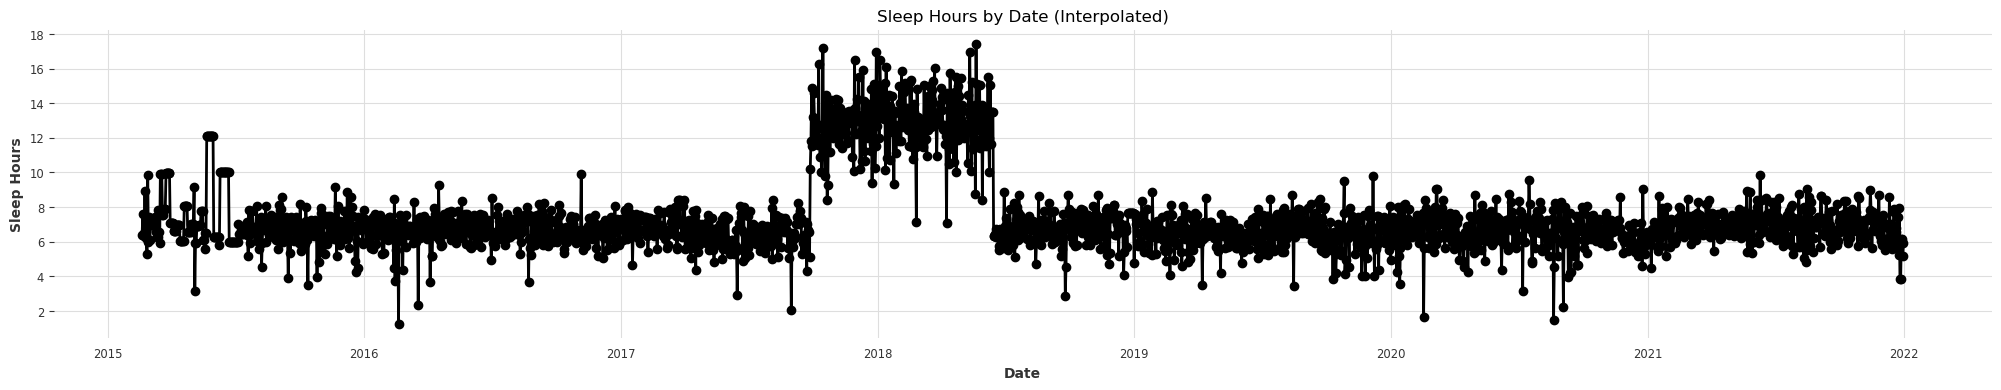

In [25]:

# Fill missing values using linear interpolation
# This line fills the missing values in the 'sleep_hours' column of the DataFrame merged_df using linear interpolation.
# The interpolate() function is applied to the 'sleep_hours' column, and the method='nearest' parameter specifies that 
# the nearest non-null value should be used to fill the missing values
merged_df['sleep_hours'] = merged_df['sleep_hours'].interpolate(method='nearest')

# Calculate the number of missing days
# These lines calculate the number of missing days in the 'sleep_hours' column. The isnull() function is used to 
# identify the missing values, and sum() calculates the total count of missing values. The result is stored in
# the variable missing_days, and then printed with an accompanying message.
missing_days = merged_df['sleep_hours'].isnull().sum()
print('Number of missing days:', missing_days)

# Visualize the filled data
plt.figure(figsize=(25, 4))
plt.plot(merged_df['date'], merged_df['sleep_hours'], marker='o', linestyle='-', linewidth=2)
plt.title('Sleep Hours by Date (Interpolated)')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.grid(True)

# Show the plot
plt.show()

# Summary of the code:
# The code fills the missing values in the 'sleep_hours' column of the DataFrame using linear interpolation.
# It then calculates the number of missing days and prints the count. After that, it visualizes the filled data 
# by creating a line plot with dates on the x-axis and sleep hours on the y-axis. The plot shows the interpolated 
# values and provides an overview of the sleep hours by date.

# Data Distribution

In [26]:
# This line imports the Plotly Express module, which provides a high-level interface for creating interactive plots.
import plotly.express as px

# This line creates a histogram figure using the px.histogram() function from Plotly Express. 
# It takes the DataFrame merged_df as input and specifies that the 'sleep_hours' column should be used as the x-axis variable. 
# The title parameter sets the title of the plot to 'Distribution of the Training Data', and nbins=10 specifies the number of bins in the histogram
fig = px.histogram(merged_df, x='sleep_hours', title='Distribution of the Training Data', nbins=10)
# This line updates the visual properties of the histogram bars. It sets the marker_color to '#636EFA' 
# (a shade of blue), marker_line_color to 'white', and marker_line_width to 0.5. This customization gives the bars a consistent appearance.
fig.update_traces(marker_color='#636EFA', marker_line_color='white', marker_line_width=0.5)
# This block of code updates the layout of the figure. It sets the x-axis title to 'Number of Hours', 
# the y-axis title to 'Frequency', removes the legend, sets the plot background color to '#f2f2f2', and updates 
# the font settings to use the Arial font, size 12, and color '#333333' for the text
fig.update_layout(
    xaxis_title='Number of Hours',
    yaxis_title='Frequency',
    showlegend=False,
    plot_bgcolor='#f2f2f2',
    font=dict(
        family='Arial',
        size=12,
        color='#333333'
    )
)
# These lines update the grid properties of the x-axis and y-axis, respectively. 
# They set showgrid to True to display the grid lines, gridwidth to 0.5 to control 
# the thickness of the grid lines, and gridcolor to 'lightgray' to set the color of the grid lines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')

fig.show()


# Data

In [27]:
import plotly.graph_objects as go

# Creating the scatter plot
# This line creates an empty figure object using the go.Figure() constructor. The figure object will be used to add traces and customize the plot
fig = go.Figure()

# Adding scatter trace
# This line adds a scatter trace to the figure. It uses the go.Scatter() constructor from Plotly graph objects.
# The x and y parameters specify the data for the x-axis and y-axis, respectively. The mode parameter is set to 
# 'markers' to display individual data points. The name parameter sets the name of the trace, which will be used in the legend.
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['sleep_hours'], mode='markers', name='Sleep Hours'))

# Adding line trace
# This line adds a second scatter trace to the figure. It has the same data as the previous trace but the mode parameter is set to 'lines' to create a line plot instead of markers. This trace represents the trend of sleep hours over time
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['sleep_hours'], mode='lines', name='Sleep Hours Trend'))

# Customizing the axes labels
# This line updates the layout of the figure by setting the x-axis title to 'Date' and the y-axis title to 'Sleep Hours'. It customizes the axes labels.
fig.update_layout(xaxis_title='Date', yaxis_title='Sleep Hours')

# Customizing the grid lines
# These lines further customize the layout by adding grid lines to the x-axis and y-axis. 
# They set showgrid to True to display the grid lines, gridwidth to 0.5 to control the 
# thickness of the grid lines, and gridcolor to 'lightgray' to set the color of the grid lines
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
                  yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'))

# Setting the title
fig.update_layout(title='Data : Sleep Hours by Date')

# Displaying the plot
fig.show()


# Summary :
# The code uses Plotly graph objects to create a scatter plot of the sleep hours by date. 
# It adds two scatter traces, one with markers representing individual sleep hour values
# and another with a line representing the trend. It customizes the axes labels, adds grid lines, sets the title, 
# and displays the plot. The final plot will show the sleep hours data with markers and a trend line,
# along with customized labels, grid lines, and title for a visually appealing and informative visualization


# Training Data on different Sampling Freq

In [28]:
df_indexed = merged_df.set_index('date')
# These lines perform resampling on the 'sleep_hours' column of the df_indexed DataFrame.
# They aggregate the data into 36-hour and 48-hour intervals and calculate the sum of 'sleep_hours' within each interval. 
# The resulting resampled data is stored in the df_36_hourly and df_48_hourly 
df_36_hourly = df_indexed['sleep_hours'].resample('36h').sum().reset_index()
df_48_hourly = df_indexed['sleep_hours'].resample('48h').sum().reset_index()

fig = go.Figure()

# Add the 12-hourly line plot
fig.add_trace(go.Scatter(x=df_36_hourly['date'], y=df_36_hourly['sleep_hours'], mode='lines', name='36-Hourly'))
fig.add_trace(go.Scatter(x=df_36_hourly['date'], y=df_36_hourly['sleep_hours'], mode='markers', name='36-Hourly'))



fig.add_trace(go.Scatter(x=df_48_hourly['date'], y=df_48_hourly['sleep_hours'], mode='lines', name='48-Hourly'))
fig.add_trace(go.Scatter(x=df_48_hourly['date'], y=df_48_hourly['sleep_hours'], mode='markers', name='48-Hourly'))

# Customize the axes labels
fig.update_layout(xaxis_title='Date', yaxis_title='Sleep Hours')

# Customize the grid lines
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
                  yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'))

# Set the title
fig.update_layout(title='Sleep Hours by Date')

# Display the plot
fig.show()

# summary:
# The code uses Plotly graph objects to create a plot showing the sleep hours by date at 36-hour and 48-hour intervals. 
# It adds scatter traces for both the line plot and the individual data points for each interval. 
# The axes labels, grid lines, and title are customized. The final plot will show the sleep hours
# at different intervals, with line plots and markers, along with customized labels, grid lines, 
# and title for an informative visualization of the sleep hour trends over time.

# Modeling

**Box-Jenkins Framework**  
* The Box-Jenkins method is a statistical technique used for time series analysis and forecasting. The approach starts with the assumption that the process that generated the time series can be approximated using an ARMA model if it is stationary or an ARIMA model if it is non-stationary.

* The Box-Jenkins method applies autoregressive moving average (ARMA) or autoregressive integrated moving average (ARIMA) models to find the best fit of a time-series model to past values of a time series2. The model can analyze several different types of time series data for forecasting purposes3.

**ARIMA Model Pipeline**
* Autoregressive Integrated Moving Average (ARIMA) Model
    * autoregressive models: AR(p)
    * moving average models: MA(q)
    * mixed autoregressive moving average models: ARMA(p, q)
    * integration models: ARIMA(p, d, q)
    * Seasonal ARIMA (SARIMA)(p,d,q,s)  
      
**Stationary Test**  

What is stationary Data ?  

Stationary data refers to time series data that mean and variance do not vary across time. The data is considered non-stationary if there is a strong trend or seasonality observed from the data.  

**Why we need stationary Data for ARIMA Model**
ARIMA models rely on the assumption that the time series being modeled is stationary. Therefore that assumption needs to hold if you want to use these models. The ARIMA model uses differenced data to make the data stationary, which means there’s a consistency of the data over time. This function removes the effect of trends or seasonality, such as market or economic data. We make the data stationary only in case of ARIMA because the ARIMA model looks at the past data to predict future values.

In [29]:

def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

adfuller_test(merged_df['sleep_hours'])

ADF Test Statistic : -2.3185053096604094
p-value : 0.16606908047462943
#Lags Used : 20
Number of Observations Used : 2487
Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary 


In [30]:
adfuller_test(merged_df['sleep_hours'].diff(1)[1:])

ADF Test Statistic : -17.36430867229053
p-value : 5.181885740543159e-30
#Lags Used : 19
Number of Observations Used : 2487
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


# Data Pipeline

In [31]:

# converting dataframe to time series object to make the data to fit the model 
time_series_daily = TimeSeries.from_dataframe(merged_df,'date','sleep_hours',freq='D' ,fill_missing_dates=True,fillna_value=True)


# splting the datsets 98% for training the mode and 2% for testing the model
train , test = time_series_daily.split_after(0.90)

# print the shape of train and test data
print('Shape of train set : ',train.pd_dataframe().shape)
print('Shape of test set : ',test.pd_dataframe().shape)
Horizan = test.pd_dataframe().shape[0]


Shape of train set :  (2257, 1)
Shape of test set :  (251, 1)


# Inspecting Seasonality

In [32]:

from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, period = check_seasonality(time_series_daily, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 14.
There is seasonality of order 17.
There is seasonality of order 20.


# Auto Correlation plot
The autocorrelation function (ACF) is used to identify the order of ARIMA models. The ACF plot shows the correlation between the time series and its lagged version. The lag at which the ACF plot crosses the upper confidence interval for the first time is considered as the order of the MA component of the ARIMA model. Similarly, if the ACF plot decays slowly, it indicates that there is a high degree of autocorrelation in the time series, which means that an AR component should be included in the ARIMA model.

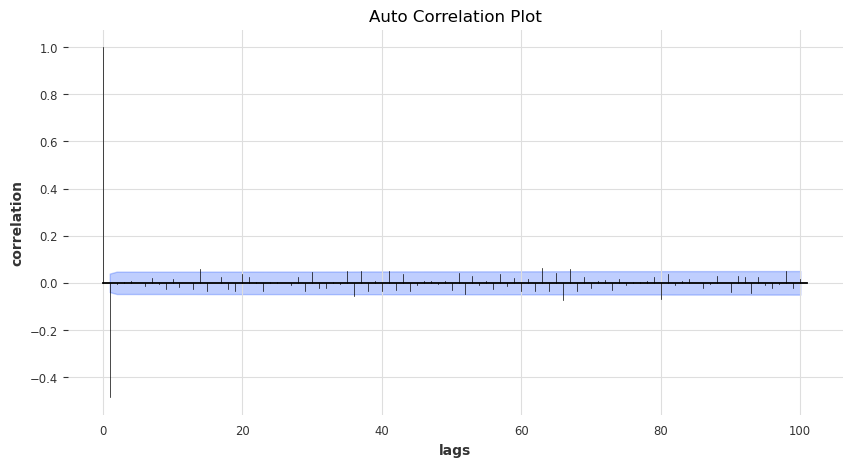

In [33]:

from darts.utils.statistics import plot_acf,plot_pacf

plot_acf(time_series_daily.diff(1), m=12, max_lag=100,  fig_size=(10, 5), axis=None, default_formatting=True)
plt.xlabel('lags')
plt.ylabel('correlation')
plt.title('Auto Correlation Plot')
plt.show()

# Partial Auto Correlation plot
The partial autocorrelation function (PACF) is also used to identify the order of ARIMA models. The PACF plot shows the correlation between the time series and its lagged version, but with the influence of the intermediate lags removed. The lag at which the PACF plot crosses the upper confidence interval for the first time is considered as the order of the AR component of the ARIMA model.

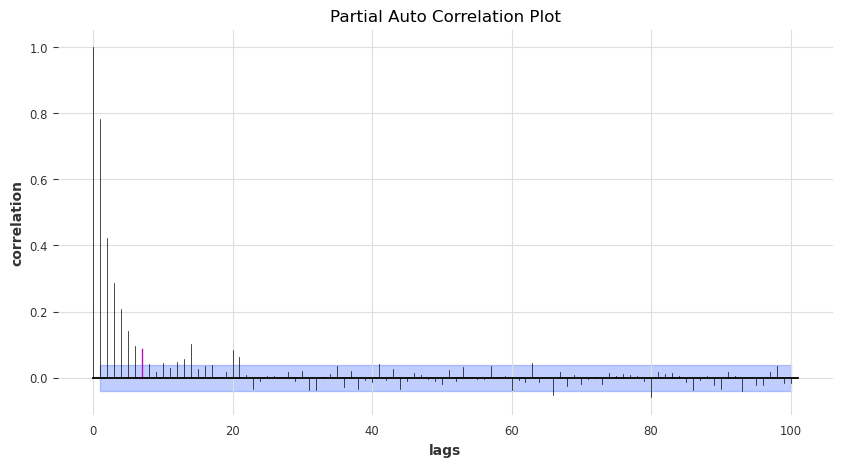

In [34]:

from darts.utils.statistics import plot_acf,plot_pacf
plot_pacf(time_series_daily, m=7, max_lag=100,  fig_size=(10, 5), axis=None, default_formatting=True)

plt.xlabel('lags')
plt.ylabel('correlation')
plt.title('Partial Auto Correlation Plot')
plt.show()

# Model Fitting

In [35]:

from darts.models.forecasting.arima import ARIMA
# these parameters has been found using correlation plot and partial correlation plots
# i added the description there please read that paragraph # and we can also test 
# other order by try and test method
arima_model =  ARIMA(p= 4 , #, for Auto regressive parameter
                    d=1  , # for difference to make the data is statioanry
                    q = 2 ,  # for the moving Average,
                    seasonal_order=(3, 1, 3, 7)
                    )

arima_model.fit(train)


ARIMA(p=4, d=1, q=2, seasonal_order=(3, 1, 3, 7), trend=None, random_state=0, add_encoders=None)

In [36]:
predictions = arima_model.predict(Horizan)

In [37]:

# Convert train_series into a pandas dataframe and reset index
df_train = train.pd_dataframe().reset_index()

# Convert test_series into a pandas dataframe and reset index
df_test = test.pd_dataframe().reset_index()

# Convert prediction into a pandas dataframe and reset index
forecast = predictions.pd_dataframe().reset_index()


x_feature ='date' 
y_feature='sleep_hours'
model_name = 'Arima Prediction'
train_test_predicted_plot(df_train,df_test,x_feature,y_feature,forecast,'ARIMA-Prediction')

# Evaluation Metrics
Suppose you have the following true and predicted time series data:

y_true = [1, 2, 3, 4, 5]
y_pred = [1.2, 2.3, 3.4, 4.5, 5.6]
To calculate the mean squared error (MSE) between y_true and y_pred, you would use the following formula:

* MSE = (1/n) * sum((y_true_i - y_pred_i)^2)
where n is the number of data points in the time series.

In this case, the MSE would be:

* MSE = (1/5) * ((1-1.2)^2 + (2-2.3)^2 + (3-3.4)^2 + (4-4.5)^2 + (5-5.6)^2) = 0.26 To calculate the mean absolute percentage error (MAPE) between y_true and y_pred, you would use the following formula:

* MAPE = (1/n) * sum(abs((y_true_i - y_pred_i)/y_true_i)) In this case, the MAPE would be:

MAPE = (1/5) * (abs((1-1.2)/1) + abs((2-2.3)/2) + abs((3-3.4)/3) + abs((4-4.5)/4) + abs((5-5.6)/5)) = 0.083 The MSE measures the average squared difference between the predicted and true values in a time series. It is a measure of how well your model fits the data.

The MAPE measures the average percentage difference between the predicted and true values in a time series. It is a measure of how well your model predicts future values.

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
def Evaluations_metrics(y_true,y_pred):
        
    # y_true and y_pred are your true and predicted time series data
    mse_value = mean_squared_error(y_true, y_pred)
    mape_value = mean_absolute_percentage_error(y_true, y_pred)*100
    mae_value = mean_absolute_error(y_true, y_pred)
    rmse_value = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print('Mean Sqaured Error(MSE) : ',mse_value)
    print('Mean absolute Percentage Error (MAPE)(percentage Error) : ',mape_value)
    print('Mean Absolute Error  : ',mae_value)
    print('Root Mean Sqaure Error :',rmse_value)
    
    
    return mse_value , mape_value ,mae_value ,rmse_value

mse_value , mape_value ,mae_value ,rmse_value = Evaluations_metrics(df_test['sleep_hours'].tolist() ,forecast['sleep_hours'].tolist() )


Mean Sqaured Error(MSE) :  0.7845762088662277
Mean absolute Percentage Error (MAPE)(percentage Error) :  10.483367766978633
Mean Absolute Error  :  0.6961347748863244
Root Mean Sqaure Error : 0.8857630658738418


# LSTM Model
## Working of LSTM 
LSTM, short for Long Short-Term Memory, is a type of recurrent neural network (RNN) architecture that is specifically designed to capture and remember long-term dependencies in sequential data. It overcomes the limitations of traditional RNNs in capturing long-term dependencies by introducing memory cells and gating mechanisms.

The key idea behind LSTM is the use of memory cells, which can store information over long periods of time. Each memory cell has three main components: an input gate, a forget gate, and an output gate. These gates control the flow of information into, out of, and within the memory cell.

1. Input Gate: The input gate determines how much new information should be stored in the memory cell. It takes the current input and the previous hidden state as inputs and applies a sigmoid activation function to generate a number between 0 and 1 for each element. A value close to 1 means that the information is important and should be stored in the memory cell.

2. Forget Gate: The forget gate decides which information to discard from the memory cell. It takes the current input and the previous hidden state as inputs and applies a sigmoid activation function. This gate determines which information is no longer relevant and should be forgotten. A value close to 0 means that the information should be forgotten, while a value close to 1 means it should be retained.

3. Output Gate: The output gate controls how much information from the memory cell should be used to compute the output. It takes the current input and the previous hidden state as inputs and applies a sigmoid activation function. The output gate also determines which parts of the memory cell should be outputted.

By using these gates, LSTM can selectively store, forget, and output information. This allows it to capture long-term dependencies in the input sequence and effectively handle problems where the context information is spread out over long distances

In [20]:
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
import torch
from darts.dataprocessing.transformers.scaler import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# Convert the DataFrame to a Darts TimeSeries object
series = time_series_daily

# Split the data into training, validation, and test sets
# These lines split the series into training and test sets. 80% of the data is assigned to the train variable, 
# and the remaining 20% is assigned to the test variable
train_size = int(len(series) * 0.8)
val_size = int(len(series) * 0.2)
train,test = series[:train_size], series[train_size:]

# Scale the data using TimeSeriesScaler
# These lines initialize a Scaler object and use it to scale the train and test data. 
# The fit_transform method is used on the training data to fit the scaler and
# transform the data. The transform method is used on the test data to apply the same scaling
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# This line creates an instance of EarlyStopping callback,
# which will be used during the training process to stop training early if 
# certain conditions are met. In this case, it monitors the training loss and stops training 
# if there is no improvement for 10 consecutive epochs
my_stopper = EarlyStopping(
    monitor="train_loss",
    patience=10,
    min_delta=0.05,
    mode='min',
)
# This line initializes an instance of the RNNModel class from Darts library. 
# It specifies the model type as LSTM, the number of hidden dimensions, the number of layers,
# input and output chunk lengths, loss function, optimizer, learning rate, batch size, 
# number of epochs, and other settings for logging and checkpointing.
model = RNNModel(model='LSTM', 
                 hidden_dim=32, 
                 n_rnn_layers=12, 
                 input_chunk_length=24, 
                 output_chunk_length=1,
                 loss_fn = torch.nn.MSELoss(),
                 optimizer_cls = torch.optim.Adam,
                 optimizer_kwargs = {'lr': 1e-3},
                 batch_size = 8,
                 n_epochs= 100,
                 log_tensorboard=True,
                 save_checkpoints =True,
                #  pl_trainer_kwargs = {"callbacks": [my_stopper]}
                #  add_encoders={
                #                 'cyclic': {'future': ['month']},
                #                 'datetime_attribute': {'future': ['hour', 'dayofweek']},
                #                 'position': {'past': ['relative'], 'future': ['relative']},
                #                 'custom': {'past': [lambda idx: (idx.year - 1950) / 50]},
                #                 'transformer': Scaler()
                #                 }
                 )


model.fit(series = train_scaled, verbose=True )


ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:

# Make predictions on the test set
# This line uses the trained model to make predictions on the test set (test_scaled).
# The predict method takes the length of the test 
# set as an argument and returns the predicted values
pred = model.predict(len(test_scaled))

# Inverse scale the predictions and test set for evaluation
# These lines inverse scale the predicted values (pred) and the original test set (test_scaled).
# It transforms the values back to their original scale using the inverse_transform method of the scaler object. 
# This step is necessary to compare the predictions and the actual values on the original scale

pred = scaler.inverse_transform(pred)
test = scaler.inverse_transform(test_scaled)



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE for RNN: 14.234222441978009


In [39]:
import plotly.graph_objects as go

# Convert pred and test to lists
pred_list = pred.pd_dataframe().values.flatten().tolist()
test_list = test.pd_dataframe().values.flatten().tolist()
mse_value , mape_value ,mae_value ,rmse_value = Evaluations_metrics(test_list ,pred_list )

# Create traces for predictions and test set
pred_trace = go.Scatter(
    x=list(range(len(pred_list))),
    y=pred_list,
    mode='lines',
    name='Predicted'
)

test_trace = go.Scatter(
    x=list(range(len(test_list))),
    y=test_list,
    mode='lines',
    name='Actual'
)

# Create the layout for the plot
layout = go.Layout(
    title='Predictions vs Test Data',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Value')
)

# Create the figure and add the traces
fig = go.Figure(data=[pred_trace, test_trace], layout=layout)

# Show the plot
fig.show()


Mean Sqaured Error(MSE) :  1.4179760581079888
Mean absolute Percentage Error (MAPE)(percentage Error) :  14.234222441978009
Mean Absolute Error  :  0.9031799422449639
Root Mean Sqaure Error : 1.1907879988091872
